# (23) vH16 — tst, mlp

**Motivation**: host = ```any```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

## vH16

$T = 64$

### Medium beta

$(T, \beta) = (64, 32.0)$

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|mlp')

seq_len = 64
cfg_vae['track_stats'] = True
cfg_vae['seq_len'] = seq_len
cfg_vae['init_scale'] = 1e-3

cfg_tr['kl_beta'] = 1/2 * seq_len
cfg_tr['batch_size'] = 100
cfg_tr['epochs'] = 150

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.n_iters

poisson_vH16_t-64_z-[512]_<jacob|mlp>
b100-ep150-lr(0.002)_beta(32:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,03:04)

154650

In [ ]:
tr.train()

In [ ]:
# model_name = 'poisson_vH16_t-64_z-[512]_<jacob|mlp>'
# fit_name = 'b200-ep300-lr(0.002)_beta(32:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,02:45)'

# tr, meta = load_model(model_name=model_name, fit_name=fit_name, device=device, checkpoint=-1)
# meta['checkpoint']

In [6]:
tr.n_iters, tr.model.cfg.dataset, (tr.model.cfg.seq_len, float(tr.cfg.kl_beta))

(154650, 'vH16', (64, 32.0))

In [7]:
print(tr.model.layer.n_exp)

tensor([682, 584, 509, 450, 405, 370, 342, 319, 300, 284, 271, 259, 249, 240,
        231, 224, 217, 211, 205, 199, 194, 189, 185, 181, 176, 173, 169, 166,
        162, 159, 156, 154, 151, 148, 146, 143, 141, 139, 137, 135, 133, 131,
        129, 128, 126, 124, 123, 122, 120, 119, 118, 116, 115, 114, 114, 113,
        112, 111, 111, 110, 109, 109, 109, 108], device='cuda:0',
       dtype=torch.int32)

100%|███████████████████████████████████| 2/2 [00:12<00:00,  6.17s/it]


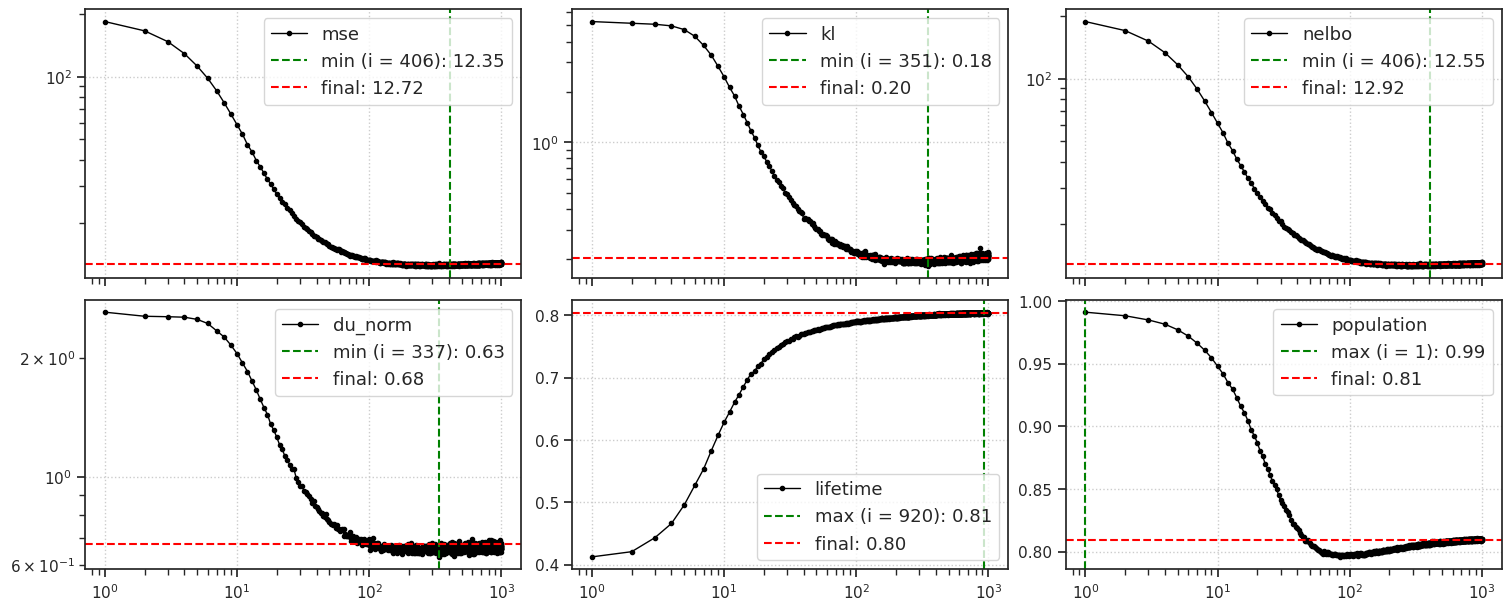

In [8]:
kws = dict(
    seq_total=1000,
    seq_batch_sz=1000,
    n_data_batches=2,
)
results = tr.analysis('vld', **kws)
_ = plot_convergence(results, color='k')

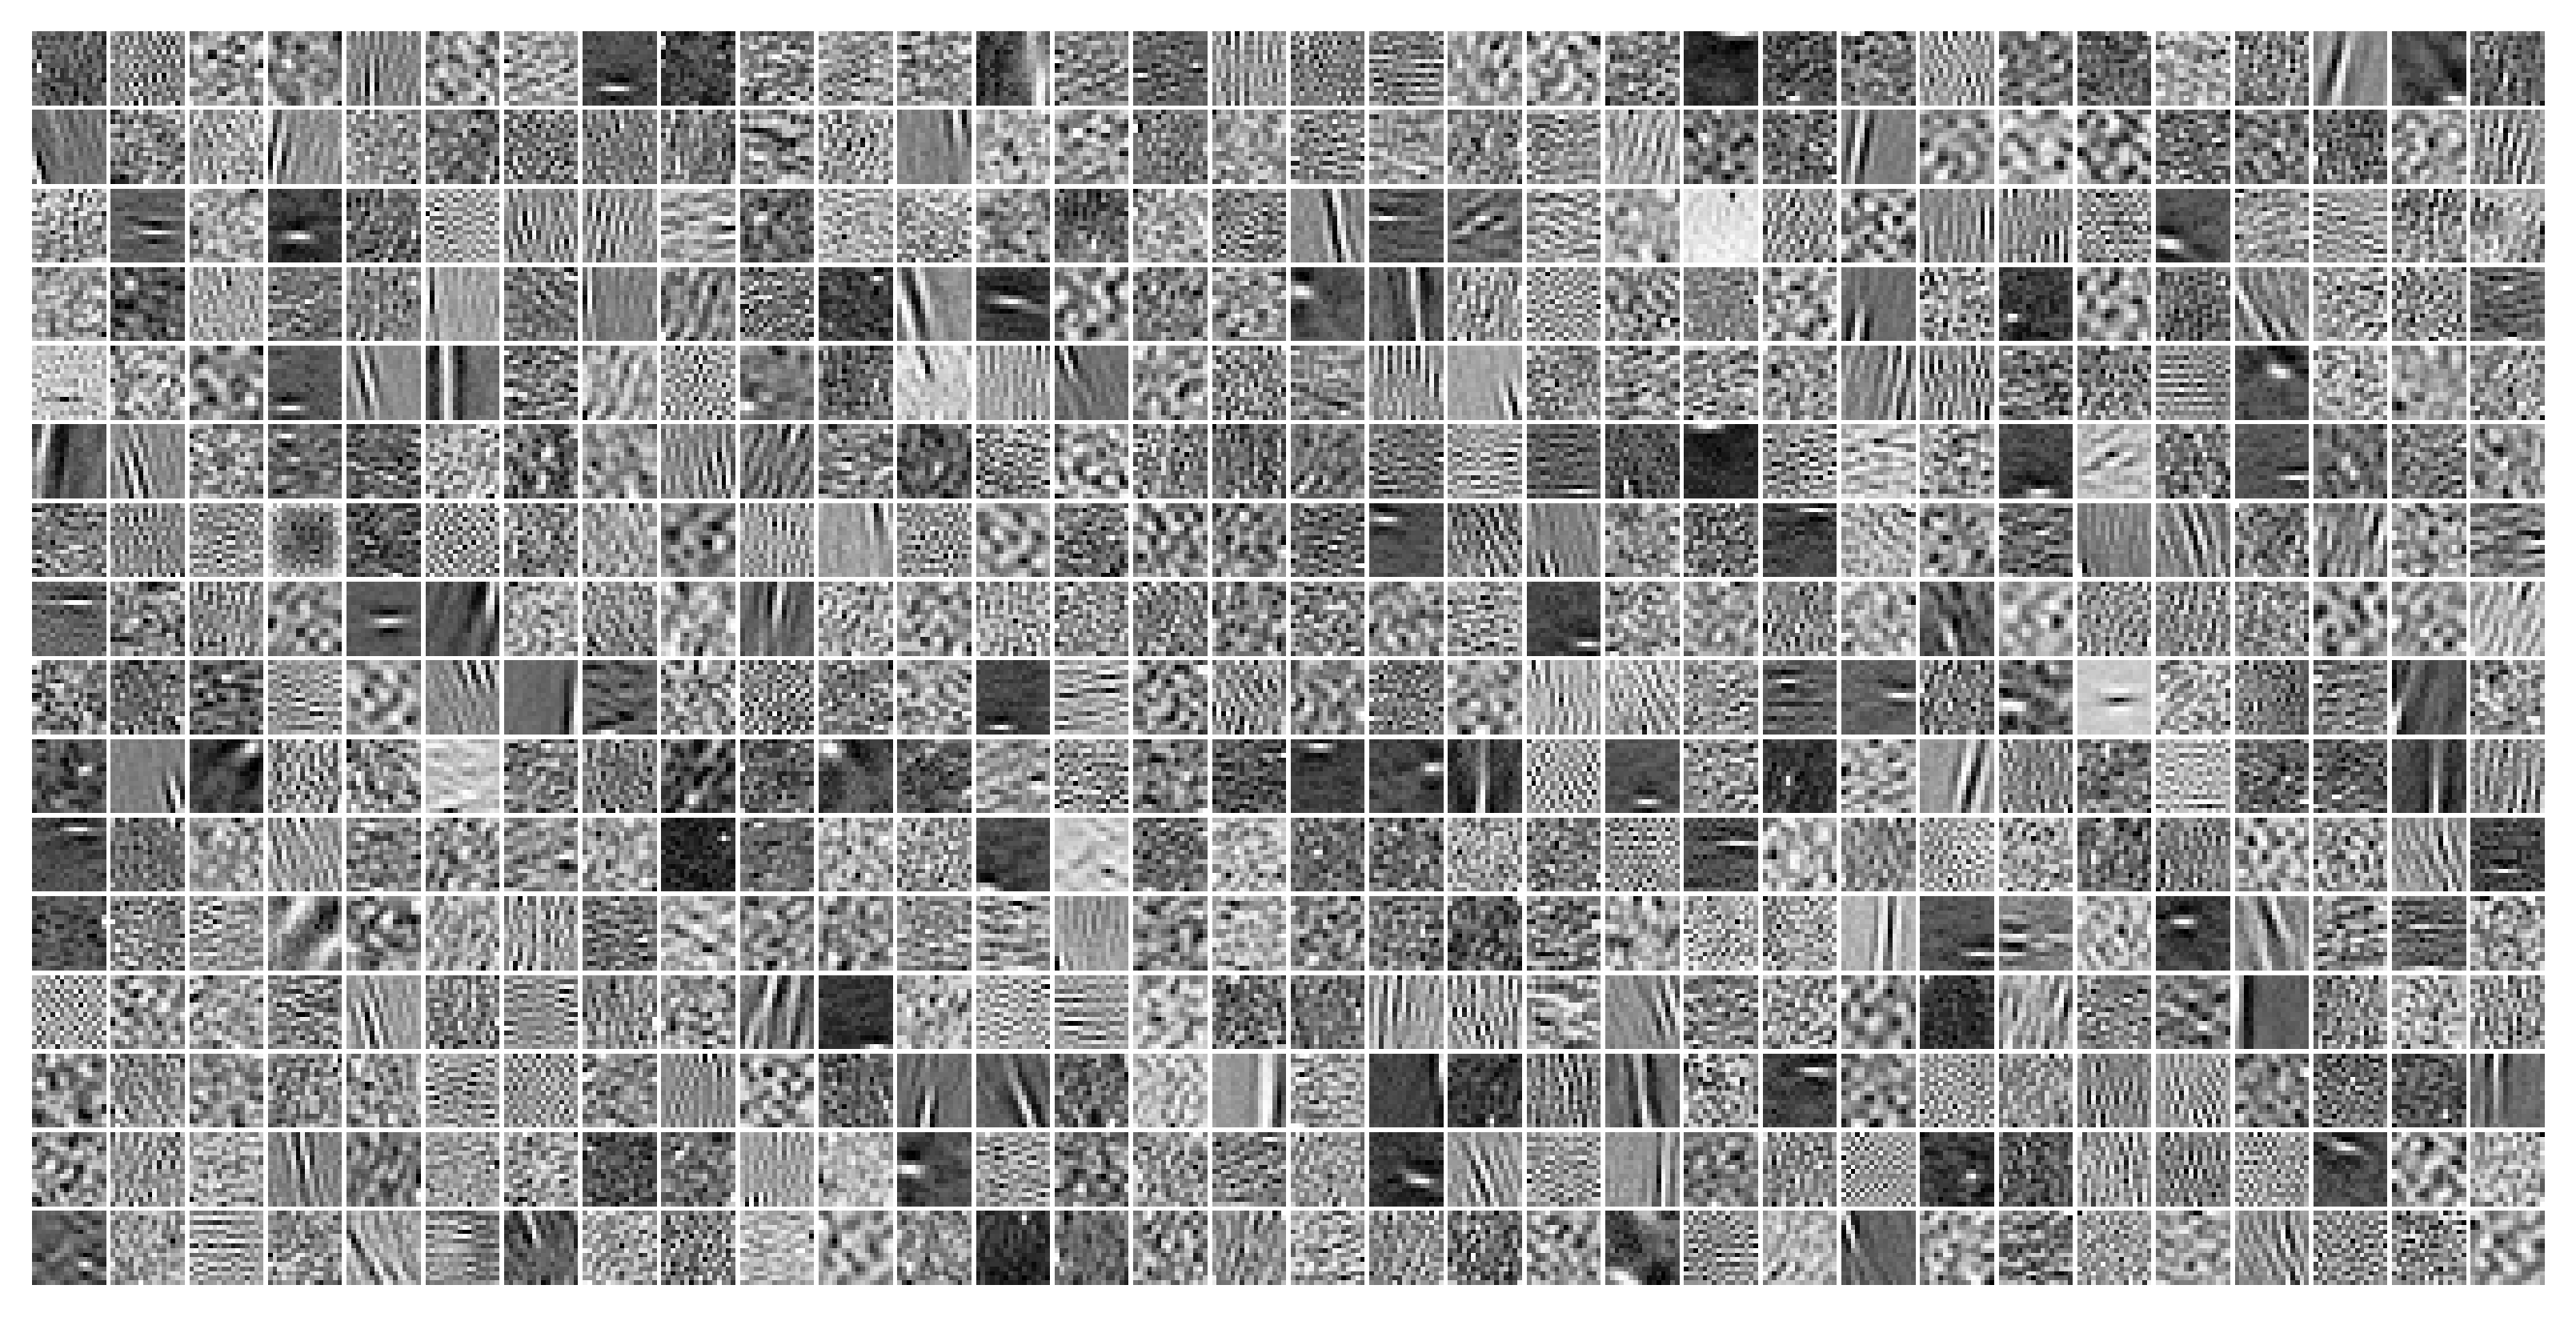

In [9]:
log_rate = tonp(tr.model.layer.log_rate.squeeze())
tr.model.show(order=np.argsort(log_rate), dpi=400);